CAR SALES ANALYSIS PROJECT

In [66]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures as pf

In [2]:
df=pd.read_csv(r'C:/Users/Shivali/Downloads/cars.csv')

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [5]:
df.describe()


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,7907.000000,7912.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,18.802005,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,5.165302,503.916303,35.822499,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,-1.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.251852,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.100000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.070000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [6]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [7]:
df.size

97536

In [8]:
df.shape

(8128, 12)

In [9]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine           221
max_power        216
seats            221
dtype: int64

In [10]:
df[(df.isnull().values==True)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,-1.0,NaN,NaN,NaN
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,-1.0,NaN,NaN,NaN
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,-1.0,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,-1.0,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,-1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,-1.0,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,-1.0,NaN,NaN,NaN
8103,Maruti Swift 1.3 VXi,2006,130000,100000,Petrol,Individual,Manual,Second Owner,-1.0,NaN,NaN,NaN
8103,Maruti Swift 1.3 VXi,2006,130000,100000,Petrol,Individual,Manual,Second Owner,-1.0,NaN,NaN,NaN


In [11]:
pd.set_option('display.max.rows',2058)

In [12]:
df[(df.isnull().values==True)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,-1.000000,NaN,NaN,NaN
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,-1.000000,NaN,NaN,NaN
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,-1.000000,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,-1.000000,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,-1.000000,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,-1.000000,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,-1.000000,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,-1.000000,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,-1.000000,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,-1.000000,NaN,NaN,NaN


In [13]:
df.value_counts(['name'],ascending=True)

name                                                  
Ambassador CLASSIC 1500 DSL AC                              1
Maruti Alto AX                                              1
Maruti Alto K10 LX                                          1
Maruti Alto K10 LXI CNG                                     1
Maruti Alto K10 VXI Optional                                1
Maruti Baleno Alpha CVT                                     1
Maruti Baleno Alpha Diesel                                  1
Maruti Baleno Delta Diesel                                  1
Maruti Baleno LXI                                           1
Maruti Baleno Sigma                                         1
Maruti Baleno Zeta                                          1
Maruti Baleno Zeta Diesel                                   1
Maruti Celerio VXI MT BSIV                                  1
Maruti Celerio VXi AMT                                      1
Maruti Celerio X VXI                                        1
Maruti Celerio 

In [14]:
df.loc[(df.isnull().values==True),['name']]

,name
13,Maruti Swift 1.3 VXi
13,Maruti Swift 1.3 VXi
13,Maruti Swift 1.3 VXi
31,Fiat Palio 1.2 ELX
31,Fiat Palio 1.2 ELX
31,Fiat Palio 1.2 ELX
78,Tata Indica DLS
78,Tata Indica DLS
78,Tata Indica DLS
87,Maruti Swift VDI BSIV W ABS


In [15]:
df[df['name']=='Maruti Swift VDI BSIV']=df[df['name']=='Maruti Swift VDI BSIV'].fillna(method='bfill')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [16]:
df.loc[df['name'].str.startswith('BMW'),['name']]

,name
82,BMW X1 sDrive20i xLine
137,BMW 5 Series 520d Sport Line
138,BMW X1 sDrive 20D xLine
139,BMW X4 M Sport X xDrive20d
149,BMW 5 Series 523i
165,BMW 3 Series 320d Luxury Line
167,BMW 5 Series 520d Luxury Line
384,BMW X4 M Sport X xDrive20d
385,BMW X4 M Sport X xDrive20d
423,BMW X4 M Sport X xDrive20d


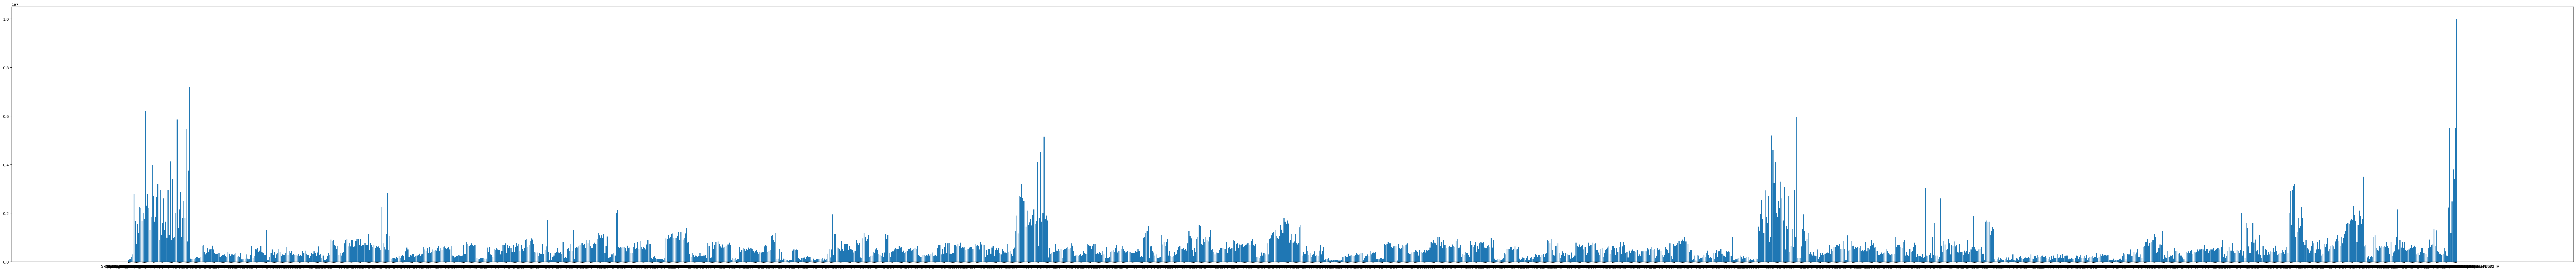

In [17]:
plt.figure(figsize=(120,12))
x=df['name'].unique()
y=df.groupby(['name'])['selling_price'].mean()
plt.bar(x,y)
plt.show()

In [18]:
df_avona=df[['fuel','selling_price']].groupby(['fuel'])
avona_result=sc.stats.f_oneway(df_avona.get_group('Petrol')['selling_price'],df_avona.get_group('Diesel')['selling_price'])
avona_result

F_onewayResult(statistic=342.352595763539, pvalue=6.957773203366255e-75)

In [19]:
df_avona1=df[['name','selling_price']].groupby(['name'])
avona_result1=sc.stats.f_oneway(df_avona1.get_group('Maruti Alto 800 LXI')['selling_price'],df_avona1.get_group('Maruti Alto LXi')['selling_price'])
avona_result12=sc.stats.f_oneway(df_avona1.get_group('BMW X4 M Sport X xDrive20d')['selling_price'],df_avona1.get_group('Lexus ES 300h')['selling_price'])
avona_result12

F_onewayResult(statistic=516.7005381944448, pvalue=5.6594661824557284e-40)

In [20]:
df[['year','km_driven','mileage','max_power','selling_price']].corr()

,year,km_driven,mileage,max_power,selling_price
year,1.000000,-0.418006,0.408595,0.227155,0.414092
km_driven,-0.418006,1.000000,-0.175175,-0.038827,-0.225534
mileage,0.408595,-0.175175,1.000000,-0.329013,-0.036770
max_power,0.227155,-0.038827,-0.329013,1.000000,0.748625
selling_price,0.414092,-0.225534,-0.036770,0.748625,1.000000


In [21]:
dummy1=pd.get_dummies(df['transmission'])
dummy2=pd.get_dummies(df['fuel'])
dummy1

,Automatic,Manual
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
8123,False,True
8124,False,True
8125,False,True
8126,False,True


In [22]:
#df=df.drop(['Automatic','Manual'],axis=1)
df=pd.concat([df,dummy1],axis=1)

In [23]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Automatic,Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,False,True
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,False,True
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,False,True
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,False,True
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,False,True
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,False,True
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,False,True


<Axes: xlabel='max_power', ylabel='selling_price'>

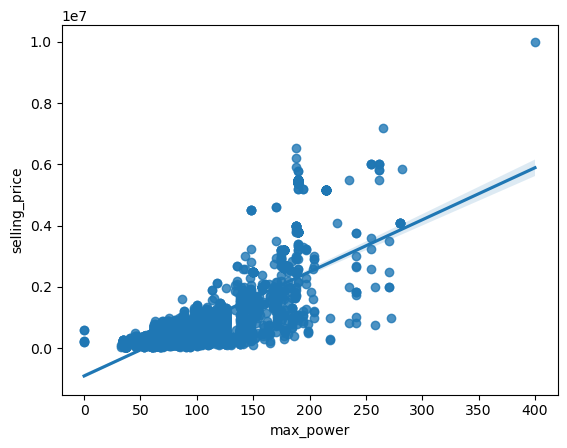

In [24]:
sns.regplot(x='max_power',y='selling_price',data=df)

<Axes: xlabel='fuel', ylabel='selling_price'>

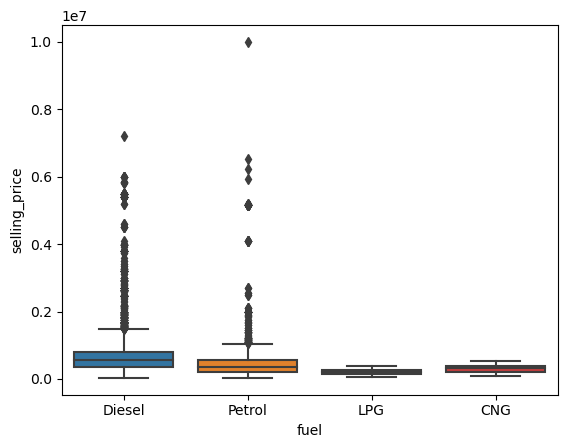

In [25]:
sns.boxplot(x='fuel',y='selling_price',data=df)

<Axes: xlabel='transmission', ylabel='selling_price'>

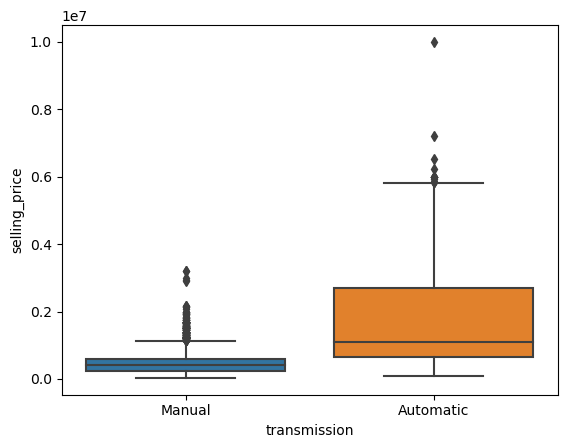

In [26]:
sns.boxplot(x='transmission',y='selling_price',data=df)

In [27]:
df1=df[['seller_type','selling_price','transmission']]
df1_group=df1.groupby(['seller_type','transmission'],as_index=False).mean()
df1_group
d1_pivot=df1_group.pivot(index='transmission',columns='seller_type')
d1_pivot

selling_price                               
seller_type         Dealer    Individual Trustmark Dealer
transmission                                             
Automatic     2.676083e+06  1.269539e+06     1.125596e+06
Manual        5.952803e+05  4.381021e+05     5.678832e+05

as_index=false will display output in SQL format, useful for dataframe


In [28]:
df_grp=df[['name','max_power']].groupby(['name'],as_index=False).mean()
df_grp['name']=df_grp['name'].str.split(' ',expand=True).loc[:,0]
df_grp=df_grp.groupby(['name'],as_index=False).mean()
df_grp

,name,max_power
0,Ambassador,47.875000
1,Ashok,75.000000
2,Audi,189.714762
3,BMW,199.741778
4,Chevrolet,88.672148
5,Daewoo,53.000000
6,Datsun,64.688966
7,Fiat,82.802727
8,Force,100.216667
9,Ford,94.723229


In [29]:
df['seats']=df['seats'].fillna(5)

In [30]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine           198
max_power        193
seats              0
Automatic          0
Manual             0
dtype: int64

In [31]:
df=df.dropna()

In [32]:
lm=lr()

In [33]:
lm.fit(df[['max_power']],df[['selling_price']])

LinearRegression()

In [34]:
Yhat=lm.predict(df[['max_power']])
Yhat

array([[349554.59954483],
       [853286.58655249],
       [417810.96634804],
       ...,
       [347848.19037475],
       [281298.23274163],
       [281298.23274163]])

In [35]:
df[['predicted_price']]=Yhat

C:\Users\Shivali\AppData\Local\Temp\ipykernel_19472\1007452046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['predicted_price']]=Yhat


In [36]:
lm.intercept_

array([-913188.18631448])

In [37]:
lm.coef_

array([[17064.0917008]])

In [38]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'Automatic', 'Manual', 'predicted_price'],
      dtype='object')

In [50]:
Z= df[['mileage','km_driven','max_power']]
lm.fit(Z,df['selling_price'])
Yhatm=lm.predict(Z)
Yhatm

array([254581.22945342, 787958.49668062, 194357.88139973, ...,
       209980.02690105, 478594.59664423, 478594.59664423])

In [51]:
Yhatm=pd.DataFrame(Yhatm)

In [56]:
df[['selling_price on 3 factors']]=Yhatm

C:\Users\Shivali\AppData\Local\Temp\ipykernel_19472\113179945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['selling_price on 3 factors']]=Yhatm


In [57]:
lm.predict(Z)

array([254581.22945342, 787958.49668062, 194357.88139973, ...,
       209980.02690105, 478594.59664423, 478594.59664423])

C:\Users\Shivali\AppData\Local\Temp\ipykernel_19472\3259788694.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['selling_price'],hist=False,color='r',label='Actual Price')
C:\Users\Shivali\AppData\Local\Temp\ipykernel_19472\3259788694.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

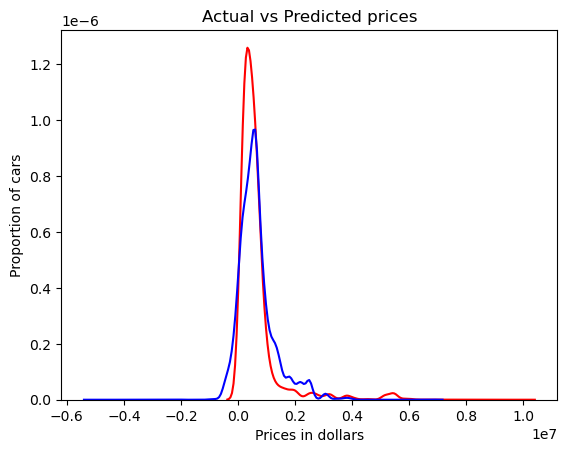

In [58]:
ax1 = sns.distplot(df['selling_price'],hist=False,color='r',label='Actual Price')
sns.distplot(Yhatm,hist=False,color='b',label='Predicted Price',ax=ax1)
plt.title('Actual vs Predicted prices')
plt.xlabel('Prices in dollars')
plt.ylabel('Proportion of cars')
plt.show()
plt.close()

In [64]:
f=np.polyfit(df['max_power'],df['selling_price'],3)
p=np.poly1d(f)
p

poly1d([-3.16631968e-01,  2.34344481e+02, -2.37784142e+04,  9.40467679e+05])

In [67]:
pr=pf(degree=3)
Z_pr=pr.fit_transform(Z)
Z_pr

array([[1.00000000e+00, 2.34000000e+01, 1.45500000e+05, ...,
        1.56659850e+12, 7.96758000e+08, 4.05224000e+05],
       [1.00000000e+00, 2.11400000e+01, 1.20000000e+05, ...,
        1.49068800e+12, 1.28596685e+09, 1.10936073e+06],
       [1.00000000e+00, 1.77000000e+01, 1.40000000e+05, ...,
        1.52880000e+12, 8.51760000e+08, 4.74552000e+05],
       ...,
       [1.00000000e+00, 1.93000000e+01, 1.20000000e+05, ...,
        1.06416000e+12, 6.55345200e+08, 4.03583419e+05],
       [1.00000000e+00, 2.35700000e+01, 2.50000000e+04, ...,
        4.37500000e+10, 1.22500000e+08, 3.43000000e+05],
       [1.00000000e+00, 2.35700000e+01, 2.50000000e+04, ...,
        4.37500000e+10, 1.22500000e+08, 3.43000000e+05]])